In [1]:
import cdpm
from cdpm import CondDirichletProcessMix
import numpy as np
import numpy.linalg as nplin
from scipy import stats
import scipy.linalg as scilin
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
%matplotlib inline
plt.style.use(['seaborn-dark-palette', 'seaborn-poster'])

In [3]:
time_dim = 50

In [4]:
np.random.seed(12345)
stick_scale = 1.5
mu, sigma = 0, 0.5 # mean and standard deviation
beta = np.random.normal(mu, sigma, 1)
sigma = stats.invwishart.rvs(df = 5, scale = 1, size=1, random_state=None)

In [5]:
# initial period

alpha_series = []
cluster_series = []  # history of clusters
cluster_mat = []  # unique value of clusters realized
beta_mat = []
sigma_mat = []
vv_mat = []

alpha_series.append(0.0)  # initial alpha value is 0.0
beta_mat.append(beta[0]) # initial beta and sigma drawn from the prior
sigma_mat.append(sigma)
cluster_mat.append(0)
cluster_series.append(0)

pp = np.random.beta(1,stick_scale,1)[0] # transition probability used in stick-breaking representation
vv_mat.append(pp)

In [6]:
cl_idx = 0
for time_idx in tqdm(range(time_dim)):

#time_idx = 2
    alpha = beta_mat[cl_idx]*alpha_series[time_idx] + np.sqrt(sigma_mat[cl_idx])*np.random.standard_normal(1)
    alpha_series.append(alpha[0])


# generate threshold values... which depends on len(cluster_mat)
    count = 1
    stick = [];
    stick.append(pp)

    while (count < len(cluster_mat)):
        vv_mat_reverse = [1-x for x in vv_mat]
#    vv_mat_reverse.pop() # get rid of the last element
        thrs_val = np.product(vv_mat_reverse[:count])*vv_mat[count]
        stick.append(thrs_val)
        count = count + 1

# determine which cluster alpha lies using the uniform random variable.
# if it's from existing cluster, then just pick existing regime/beta/sigma (when random value is smaller than one of the threshold values)
# if it's greater than the threshold, it means that new regime emerges. Draw beta/sigma from prior.

    omega_unif = np.random.uniform(0,1,1)[0]
    cl_count = 0
    cl_check = stick[cl_count]

    while (omega_unif > cl_check):
        cl_count = cl_count + 1
        if (cl_count <= len(stick)-1):
            cl_check = cl_check + stick[cl_count]        
        else:
            break
        

# when new cluster emerges, new beta/sigma drawn from prior
    if (cl_count == len(stick)):
        beta = np.random.normal(mu, sigma, 1)
        sigma = stats.invwishart.rvs(df = 5, scale = 1, size=1, random_state=None)
        beta_mat.append(beta[0])
        sigma_mat.append(sigma)
        cluster_mat.append(cl_count)
        vv_mat.append(np.random.beta(1,stick_scale,1)[0])
    
    cl_idx = cl_count        
    cluster_series.append(cl_idx)    

100%|██████████| 50/50 [00:00<00:00, 11140.25it/s]


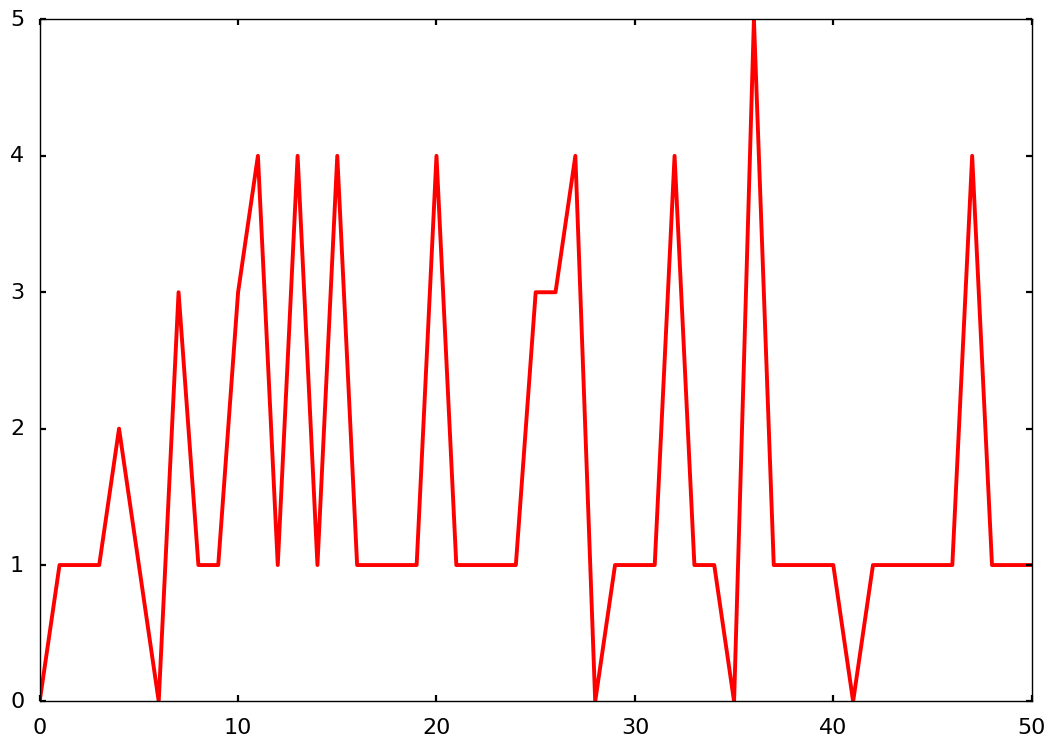

In [7]:
cluster_series_fig, cluster_series_ax = plt.subplots(1,1)
cluster_series_ax.plot(cluster_series, c='red')
import scipy.stats as scistat

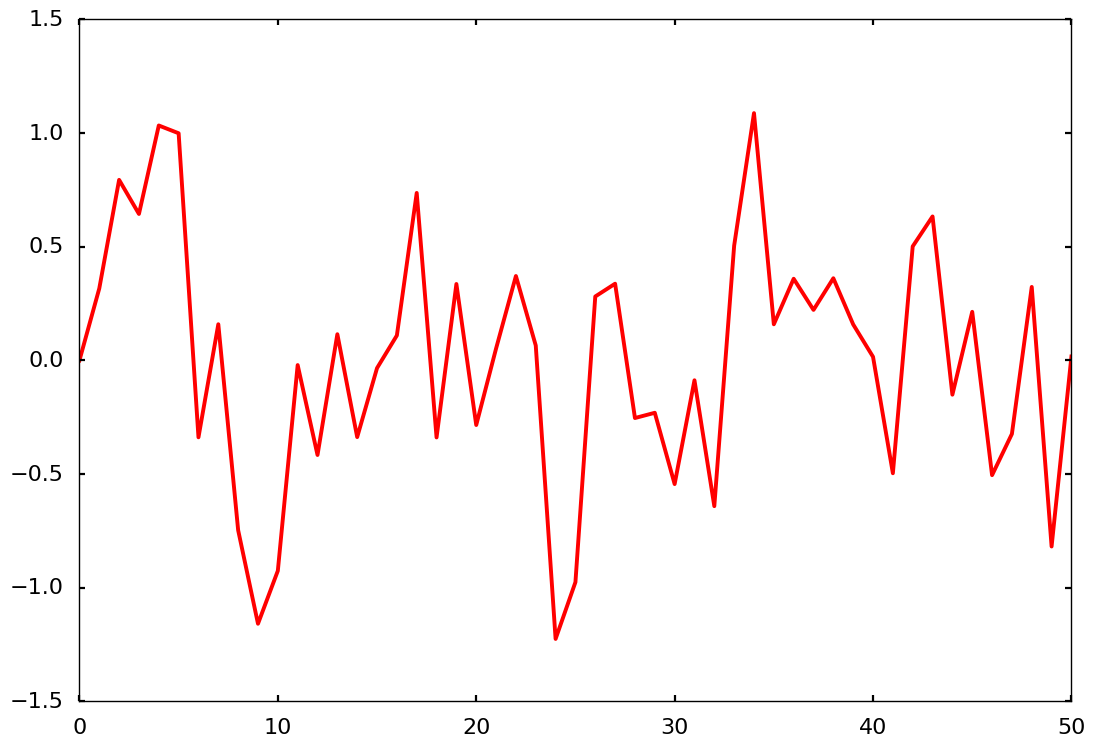

In [8]:
alpha_series_fig, alpha_series_ax = plt.subplots(1,1)
alpha_series_ax.plot(alpha_series, c='red')

In [9]:
cluster_mat

[0, 1, 2, 3, 4, 5]

In [10]:
beta_mat

[-0.10235382974235648,
 0.21119721243329279,
 -0.12679953182182765,
 0.063401451158676334,
 -0.10843837761046368,
 0.034924689769462613]

In [11]:
sigma_mat

[0.1694410515592697,
 0.2891205695720126,
 0.12104778970471701,
 0.10196249024534647,
 0.18556167847922148,
 0.069581669067280472]